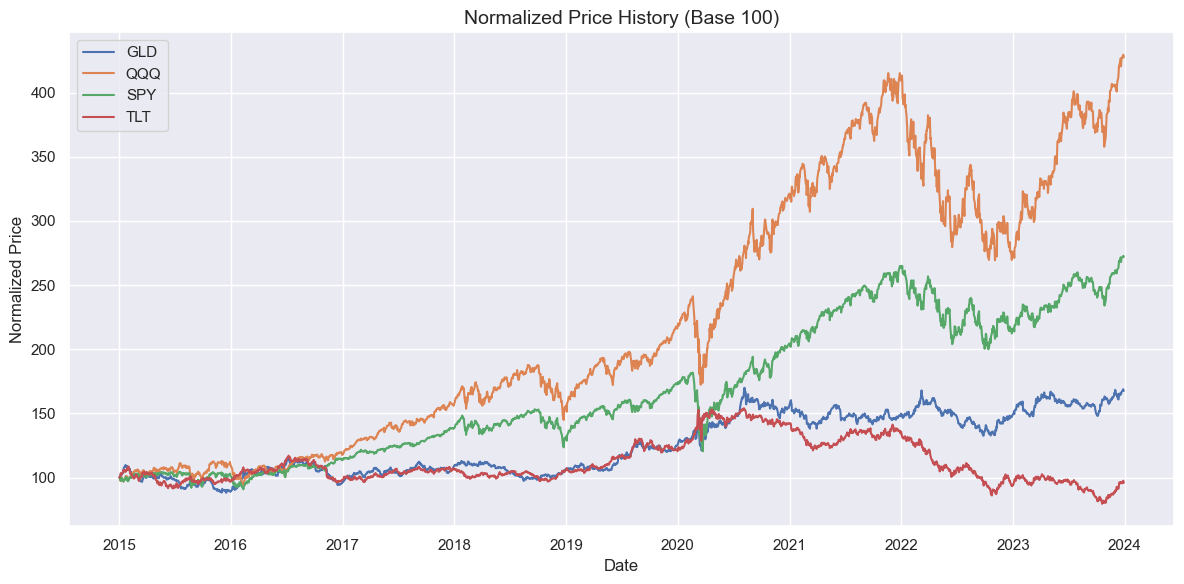

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Make charts look a bit nicer
sns.set_theme(style="darkgrid")

# 1. Load the immutable dataset you generated
df = pd.read_parquet("../data/raw/universe_daily.parquet")

# 2. Pivot the data to "Wide Format" just for plotting
# This turns the 'Ticker' column into separate columns for SPY, QQQ, etc.
price_df = df.pivot(index='Date', columns='Ticker', values='Close')

# 3. Normalize the prices to start at 100 so we can compare their performance
normalized_price = (price_df / price_df.iloc[0]) * 100

# 4. Plot the cumulative returns
plt.figure(figsize=(12, 6))
for col in normalized_price.columns:
    plt.plot(normalized_price.index, normalized_price[col], label=col)

plt.title('Normalized Price History (Base 100)', fontsize=14)
plt.ylabel('Normalized Price')
plt.xlabel('Date')
plt.legend()
plt.tight_layout()
plt.show()